In [1]:
"""1 Metodo del gradiente per l’ottimizzazione in Rn
Exercise 1.1. Si consideri f : Rn → R differenziabile. Scrivere una function Python che 
        implementi il metodo di discesa del gradiente per risolvere il problema di minimo:
                    arg minx∈Rnf(x)
        Utilizzare una flag per scegliere se utilizzare:
            step size α > 0 costante, passato in input;
            step size αk variabile, calcolato secondo la procedura di backtracking ad 
                ogni iterazione k-esima."""
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def next_step(x,grad): # backtracking procedure for the choice of the steplength
  alpha=1.1
  rho = 0.5
  c1 = 0.25 
  p=-grad
  j=0
  jmax=10
  while ((f(x+alpha*p) > f(x)+c1*alpha*np.dot(grad,p)) and j<jmax ): 
    alpha= rho*alpha
    j+=1
  if (j>jmax):
    return -1
  else:
    print('alpha=',alpha)
    return alpha


def minimize(f,grad_f,x0,step,maxit,tol,xTrue,fixed=True): 
  #declare x_k and gradient_k vectors
  # x_list only for logging
  x_list=np.zeros((2,maxit+1))

  norm_grad_list=np.zeros(maxit+1)
  function_eval_list=np.zeros(maxit+1)
  error_list=np.zeros(maxit+1)
  
  #initialize first values
  x_last = x0

  x_list[:,0] = x_last
  
  k=0

  function_eval_list[k]=f(x0) 
  error_list[k]=np.linalg.norm(x_last-xTrue)
  norm_grad_list[k]=np.linalg.norm(grad_f(x0))

  while (np.linalg.norm(grad_f(x_last))>tol and k < maxit ):
    k=k+1
    grad = grad_f(x_last)#direction is given by gradient of the last iteration
    
    
    if fixed:
        # Fixed step
        step = step #step di input
    else:
        # backtracking step
        step = next_step(x_last,grad)
    
    if(step==-1):
      print('non convergente')
      return (k) #no convergence

    x_last=x_last-step*grad
    
    x_list[:,k] = x_last

    function_eval_list[k]=f(x_last)
    error_list[k]=np.linalg.norm(x_last-xTrue)
    norm_grad_list[k]=np.linalg.norm(grad_f(x_last))

  function_eval_list = function_eval_list[:k+1]
  error_list = error_list[:k+1]
  norm_grad_list = norm_grad_list[:k+1]
  
  print('iterations=',k)
  print('last guess: x=(%f,%f)'%(x_list[0,k],x_list[1,k]))
 
  return (x_last,norm_grad_list, function_eval_list, error_list, x_list, k)

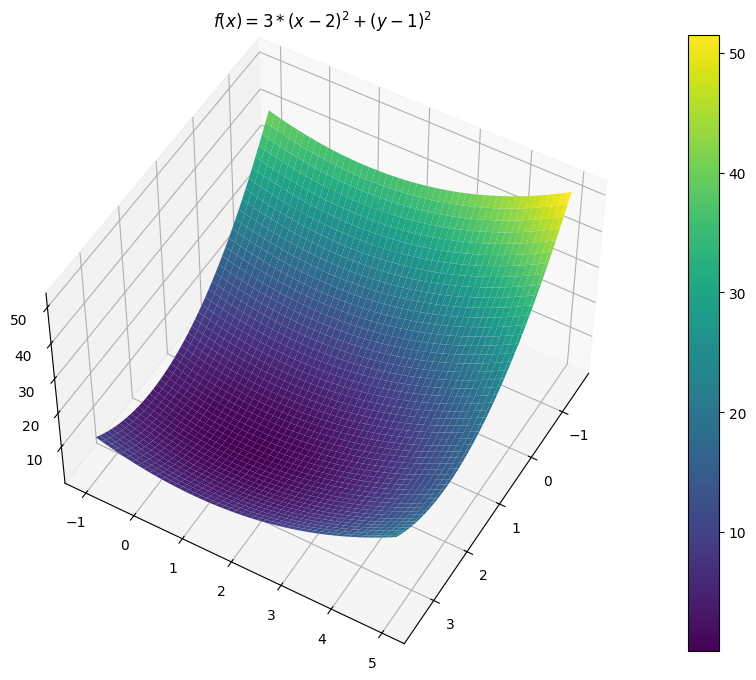

iterations= 1000
last guess: x=(2.000006,1.072677)
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.1375
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.1375
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.1375
alpha= 0.275
alpha= 0.275
alpha= 0.275
alpha= 0.1375
alpha= 0.275
iterations= 20
last guess: x=(2.000001,1.000003)


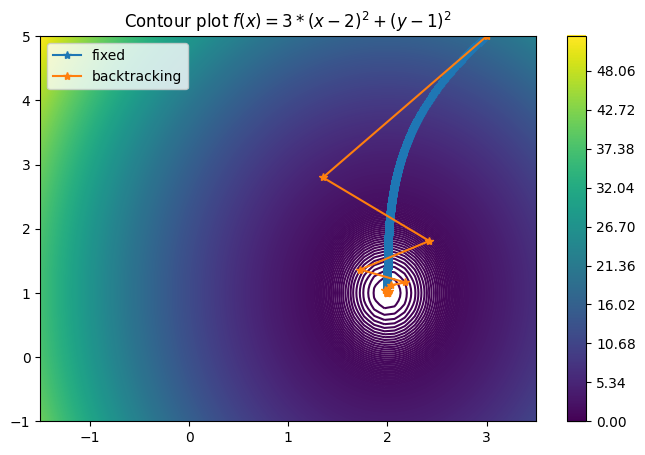

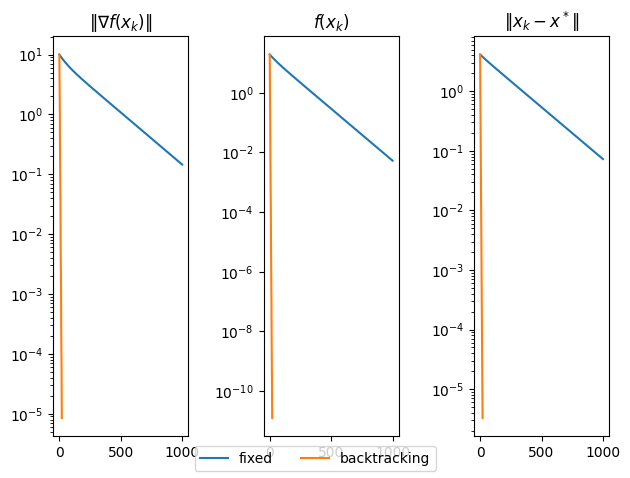

In [5]:
"""Exercise 1.2. Si consideri la seguente funzione
                    f(x,y) = 3(x −2)2+ (y −1)2 
    che ha un minimo globale in (2,1) dove f(2,1) = 0.
    plottare la superficie f(x,y) con il comando plot surface nel dominio 
        [−1.5,3.5] × [−1,5].
    plottare le curve di livello di f(x,y) con il comando contour nello stesso dominio.
    determinare il punto di minimo di f(x,y) utilizzando la funzione precedentemente 
        scritta (sia con passo fisso che con passo variabile) usando come punto iniziale 
        (3,5).
    si analizzino i risultati in entrambi i casi."""
def f(vec):
    x, y = vec
    fout = 3*(x - 2)**2 + (y - 1)**2
    return fout

def grad_f(vec):
    x, y = vec
    dfdx = 6*(x - 2)
    dfdy = 2*(y - 1)
    return np.array([dfdx,dfdy])

x = np.linspace(-1.5,3.5)
y = np.linspace(-1,5,100)

X, Y = np.meshgrid(x, y)
vec = np.array([X,Y])
Z=f(vec)

fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection='3d')
ax.set_title('$f(x)=3*(x-2)^2 + (y-1)^2$')
ax.view_init(elev=50., azim=30)
s = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(s)
plt.show()

fig = plt.figure(figsize=(8, 5))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title('Contour plot $f(x)=3*(x-2)^2 + (y-1)^2$')
fig.colorbar(contours) 
#plt.show()

step = 0.002
maxitS=1000
tol=1.e-5
x0 = np.array([3,5])
xTrue = np.array([2,1])
(x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True)
plt.plot(xlist[0,:k],xlist[1,:k],'*-')
(x_last,norm_grad_list, function_eval_list, error_list, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=False)
plt.plot(xlist[0,:k],xlist[1,:k],'*-')
plt.legend(['fixed', 'backtracking'])
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(norm_grad_listf)
ax1.semilogy(norm_grad_list)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(function_eval_listf)
ax2.semilogy(function_eval_list)
ax2.set_title('$f(x_k)$')
ax3.semilogy(error_listf)
ax3.semilogy(error_list)
ax3.set_title('$\|x_k-x^*\|$')
fig.tight_layout()
fig.legend(['fixed', 'backtracking'], loc='lower center', ncol=4)
plt.show()

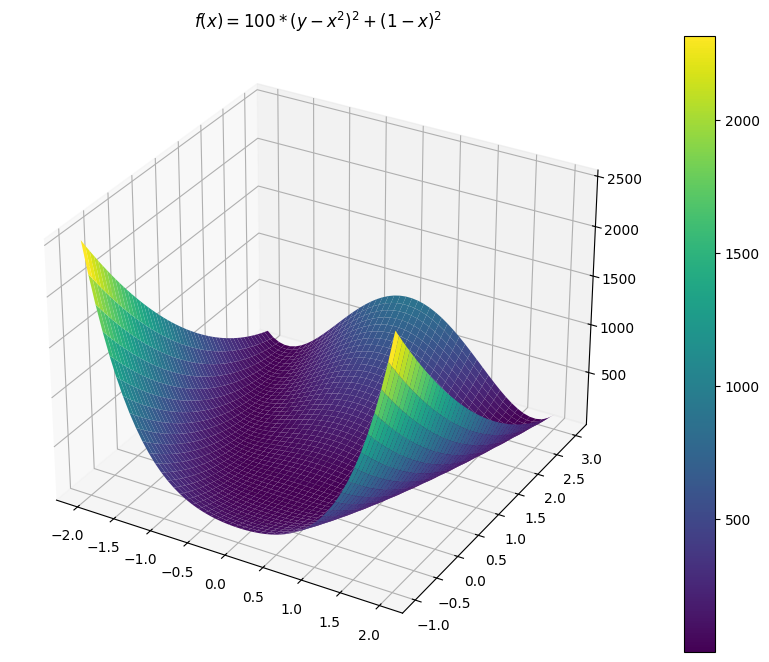

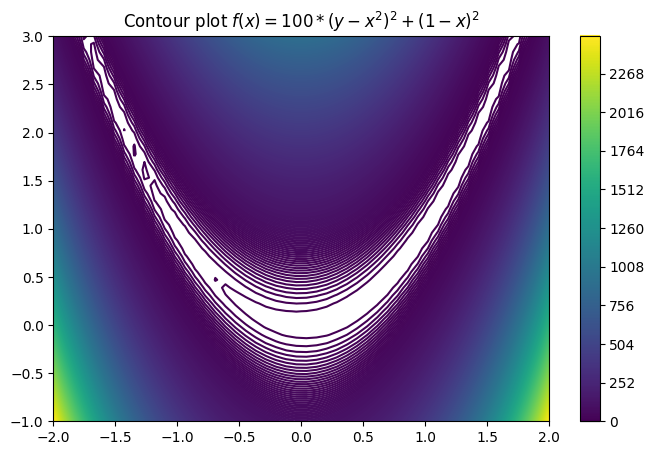

iterations= 1000
last guess: x=(0.482604,0.230313)
alpha= 0.0021484375
alpha= 0.004296875
alpha= 0.0021484375
alpha= 0.0021484375
alpha= 0.55
alpha= 0.004296875
alpha= 0.275
alpha= 0.0021484375
alpha= 0.06875
alpha= 0.0021484375
alpha= 0.275
alpha= 0.0021484375
alpha= 0.0021484375
alpha= 0.004296875
alpha= 0.004296875
alpha= 0.0021484375
alpha= 0.0171875
alpha= 0.0021484375
alpha= 0.00859375
alpha= 0.0021484375
alpha= 0.00859375
alpha= 0.0021484375
alpha= 0.00859375
alpha= 0.0021484375
alpha= 0.00859375
alpha= 0.0021484375
alpha= 0.00859375
alpha= 0.0021484375
alpha= 0.00859375
alpha= 0.0021484375
alpha= 0.00859375
alpha= 0.0021484375
alpha= 0.00859375
alpha= 0.0021484375
alpha= 0.004296875
alpha= 0.004296875
alpha= 0.0021484375
alpha= 0.00859375
alpha= 0.0021484375
alpha= 0.00859375
alpha= 0.0021484375
alpha= 0.00859375
alpha= 0.0021484375
alpha= 0.004296875
alpha= 0.004296875
alpha= 0.0021484375
alpha= 0.00859375
alpha= 0.0021484375
alpha= 0.004296875
alpha= 0.004296875
alpha= 0.0021

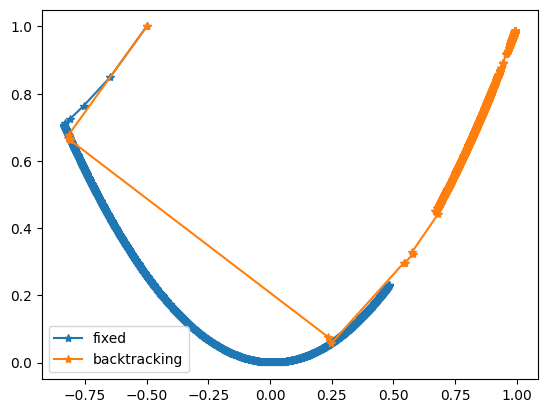

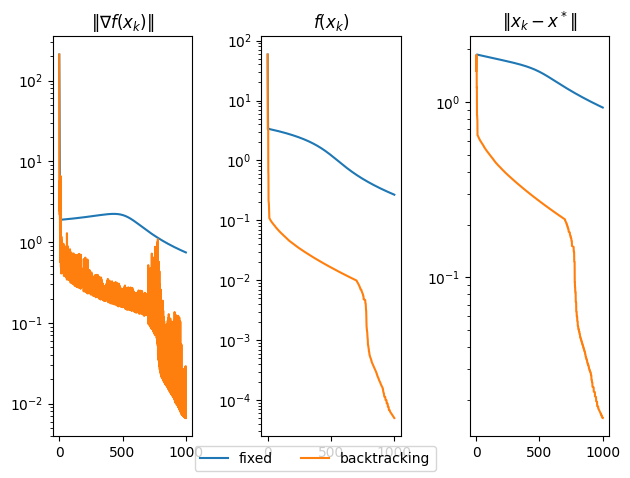

In [6]:
"""Exercise 1.3. Si consideri la seguente funzione detta funzione di Rosenbrock:
                    f(x,y) = 100(y −x2)2+ (1 −x)2
    che ha un minimo globale in (1,1) dove f(1,1) = 0. Si eseguano le richieste 
    dell’esercizio precedente nel dominio [−2,2] × [−1,3], usando come punto iniziale 
    (−0.5,1).
    Suggerimento per l’analisi dei risultati: confrontare l’accuratezza e il numero di 
    iterazioni dei metodi al variare del punto iniziale,dei parametri per i criteri di 
    arresto, dei valori α quando il passo `e costante e nel caso del passo variabile. 
    Spiegare il comportamento dei metodi nei diversi casi."""

def f(vec):
    x, y = vec
    fout = 100*(y - x**2)**2+ (1 - x)**2
    return fout

def grad_f(vec):
    x, y = vec
    dfdx = -400*x*y+400*x**3-2+2*x
    dfdy = 200*y-200*x**2
    return np.array([dfdx,dfdy])
    
x = np.linspace(-2,2)
y = np.linspace(-1,3)
X, Y = np.meshgrid(x, y)
vec = np.array([X,Y])
Z=f(vec)


fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection='3d')
ax.set_title('$f(x)=100*(y-x^2)^2+(1-x)^2$')
#ax.view_init(elev=50., azim=30)
s = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(s)
plt.show()

fig = plt.figure(figsize=(8, 5))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title('Contour plot $f(x)=100*(y-x^2)^2+(1-x)^2$')
fig.colorbar(contours)
plt.show()

step = 0.001
maxitS=1000
tol=1.e-5
x0 = np.array([-0.5,1])
xTrue = np.array([1,1])
(x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True)
plt.plot(xlist[0,:k],xlist[1,:k],'*-')
(x_last,norm_grad_list, function_eval_list, error_list, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=False)
plt.plot(xlist[0,:k],xlist[1,:k],'*-')
plt.legend(['fixed', 'backtracking'])
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(norm_grad_listf)
ax1.semilogy(norm_grad_list)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(function_eval_listf)
ax2.semilogy(function_eval_list)
ax2.set_title('$f(x_k)$')
ax3.semilogy(error_listf)
ax3.semilogy(error_list)
ax3.set_title('$\|x_k-x^*\|$')
fig.legend(['fixed', 'backtracking'], loc='lower center', ncol=4)
fig.tight_layout()
plt.show()